Лабораторна робота 2 

ФБ-24 Савісько Богдан

In [ ]:
import urllib.request
import datetime
import os
import pandas as pd
import matplotlib.pyplot as plt



Downloading Files

In [20]:
province_ids = range(1, 28)
base_url = 'https://www.star.nesdis.noaa.gov/smcd/emb/vci/VH/get_TS_admin.php?country=UKR&provinceID={}&year1=1981&year2=2024&type=Mean'

if not os.path.exists('csv_data'):
    os.makedirs('csv_data')

for province_id in province_ids:
    current_datetime = datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
    expected_filename = 'VHI_{}_{}.csv'.format(province_id, current_datetime)
    filepath = os.path.join('csv_data', expected_filename)
    
    file_exists = any(filename.startswith('VHI_{}'.format(province_id)) for filename in os.listdir('csv_data'))
    
    if file_exists:
        print('Файл VHI_{} вже існує'.format(province_id))
    else:
        url = base_url.format(province_id)
        try:
            urllib.request.urlretrieve(url, filepath)
            print('Файл {} успішно скачано.'.format(expected_filename))
        except Exception as e:
            print('Помилка при скачуванні файлу для provinceID {}: {}'.format(province_id, str(e)))



Файл VHI_1 вже існує
Файл VHI_2 вже існує
Файл VHI_3 вже існує
Файл VHI_4 вже існує
Файл VHI_5 вже існує
Файл VHI_6 вже існує
Файл VHI_7 вже існує
Файл VHI_8 вже існує
Файл VHI_9 вже існує
Файл VHI_10 вже існує
Файл VHI_11 вже існує
Файл VHI_12 вже існує
Файл VHI_13 вже існує
Файл VHI_14 вже існує
Файл VHI_15 вже існує
Файл VHI_16 вже існує
Файл VHI_17 вже існує
Файл VHI_18 вже існує
Файл VHI_19 вже існує
Файл VHI_20 вже існує
Файл VHI_21 вже існує
Файл VHI_22 вже існує
Файл VHI_23 вже існує
Файл VHI_24 вже існує
Файл VHI_25 вже існує
Файл VHI_26 вже існує
Файл VHI_27 вже існує


Read downloaded text files into the dataframe

In [5]:
all_dfs = []

dir_path = "csv_data"

if not os.path.exists(dir_path) or not os.path.isdir(dir_path):
    print(f"Directory {dir_path} does not exist or is not a directory")
else:
    files = os.listdir(dir_path)

    for i, file in enumerate(files):
        if file.endswith(".csv"):
            file_path = os.path.join(dir_path, file)
            df = pd.read_csv(file_path, index_col=False, header=1)
            df['ID'] = i + 1
            all_dfs.append(df)

    df = pd.concat(all_dfs).drop_duplicates().reset_index(drop=True)

df

,year,week,SMN,SMT,VCI,TCI,VHI<br>,ID
0,<tt><pre>1982,1.0,0.066,266.54,40.85,32.55,36.70,1
1,1982,2.0,0.066,267.40,42.87,28.53,35.70,1
2,1982,3.0,0.065,268.03,42.87,25.85,34.36,1
3,1982,4.0,0.061,268.46,39.17,25.89,32.53,1
4,1982,5.0,0.053,268.39,33.90,27.52,30.71,1
...,...,...,...,...,...,...,...,...
60394,2024,49.0,-1.000,-1.00,-1.00,-1.00,-1.00,27
60395,2024,50.0,-1.000,-1.00,-1.00,-1.00,-1.00,27
60396,2024,51.0,-1.000,-1.00,-1.00,-1.00,-1.00,27
60397,2024,52.0,-1.000,-1.00,-1.00,-1.00,-1.00,27


data cleaning

In [6]:
df.columns = df.columns.str.replace('<br>', '').str.replace(" ", "")
df["year"] = df["year"].str.replace("<tt><pre>", "")
df = df.drop(df.loc[df['VHI'] == -1].index)
df = df.loc[df['year'] != '</pre></tt>']
df['year'] = df['year'].astype(int)

df


,year,week,SMN,SMT,VCI,TCI,VHI,ID
0,1982,1.0,0.066,266.54,40.85,32.55,36.70,1
1,1982,2.0,0.066,267.40,42.87,28.53,35.70,1
2,1982,3.0,0.065,268.03,42.87,25.85,34.36,1
3,1982,4.0,0.061,268.46,39.17,25.89,32.53,1
4,1982,5.0,0.053,268.39,33.90,27.52,30.71,1
...,...,...,...,...,...,...,...,...
60359,2024,14.0,0.245,293.63,70.63,4.31,37.48,27
60360,2024,15.0,0.263,295.11,70.93,6.48,38.70,27
60361,2024,16.0,0.281,296.36,69.87,11.03,40.46,27
60362,2024,17.0,0.298,297.46,67.69,21.05,44.40,27


4)swapping values

In [7]:
mapping = {
    1: 22,
    2: 24,
    3: 23,
    4: 25,
    5: 3,
    6: 4,
    7: 8,
    8: 19,
    9: 20,
    10: 21,
    11: 9,
    13: 10,
    14: 11,
    15: 12,
    16: 13,
    17: 14,
    18: 15,
    19: 16,
    21: 17,
    22: 18,
    23: 6,
    24: 1,
    25: 2,
    26: 7,
    27: 5,
}
df = df.loc[(df['ID']!=12) &(df['ID']!=20)]

df["ID"] = df["ID"].replace(mapping)
df


/tmp/ipykernel_18480/3128017433.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ID"] = df["ID"].replace(mapping)


,year,week,SMN,SMT,VCI,TCI,VHI,ID
0,1982,1.0,0.066,266.54,40.85,32.55,36.70,22
1,1982,2.0,0.066,267.40,42.87,28.53,35.70,22
2,1982,3.0,0.065,268.03,42.87,25.85,34.36,22
3,1982,4.0,0.061,268.46,39.17,25.89,32.53,22
4,1982,5.0,0.053,268.39,33.90,27.52,30.71,22
...,...,...,...,...,...,...,...,...
60359,2024,14.0,0.245,293.63,70.63,4.31,37.48,5
60360,2024,15.0,0.263,295.11,70.93,6.48,38.70,5
60361,2024,16.0,0.281,296.36,69.87,11.03,40.46,5
60362,2024,17.0,0.298,297.46,67.69,21.05,44.40,5


5). VHI for specific year and ID(+plot), extremes

       week    VHI
49057   1.0  47.04
49058   2.0  47.22
49059   3.0  46.38
49060   4.0  46.67
49061   5.0  46.19
49062   6.0  44.87
49063   7.0  46.18
49064   8.0  50.63
49065   9.0  53.23
49066  10.0  54.53
49067  11.0  55.62
49068  12.0  55.66
49069  13.0  55.08
49070  14.0  54.55
49071  15.0  55.05
49072  16.0  54.46
49073  17.0  55.07
49074  18.0  54.73
49075  19.0  53.66
49076  20.0  53.09
49077  21.0  51.48
49078  22.0  49.66
49079  23.0  49.49
49080  24.0  47.97
49081  25.0  48.06
49082  26.0  48.49
49083  27.0  48.95
49084  28.0  50.73
49085  29.0  53.34
49086  30.0  61.90
49087  31.0  62.38
49088  32.0  63.35
49089  33.0  64.19
49090  34.0  63.20
49091  35.0  62.85
49092  36.0  63.08
49093  37.0  62.54
49094  38.0  60.72
49095  39.0  57.42
49096  40.0  54.00
49097  41.0  49.76
49098  42.0  46.87
49099  43.0  42.93
49100  44.0  35.67
49101  45.0  33.67
49102  46.0  33.62
49103  47.0  35.20
49104  48.0  37.87
49105  49.0  38.53
49106  50.0  36.30
49107  51.0  34.55
49108  52.0 

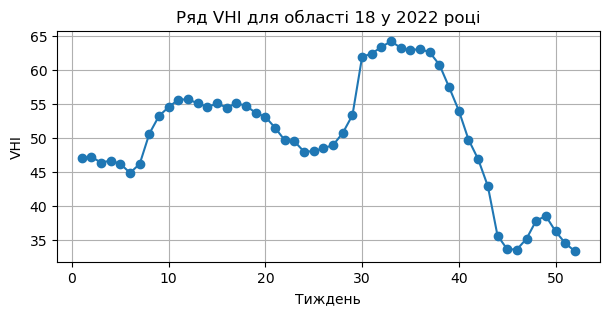

min_VHI: 28.86, max_VHI: 58.24
min_VHI: 24.71, max_VHI: 45.73
min_VHI: 20.98, max_VHI: 54.37


In [8]:
def get_VHI(year, ID, df):
    df_selected = df[(df['year'] == year) & (df['ID'] == ID)]
    if df_selected.empty:
        print("Для заданого року та ID області дані відсутні")
        return None

    print(df_selected[['week', 'VHI']])

    # графік
    plt.figure(figsize=(7, 3))
    plt.plot(df_selected['week'], df_selected['VHI'], marker='o', linestyle='-')
    plt.title(f'Ряд VHI для області {ID} у {year} році')
    plt.xlabel('Тиждень')
    plt.ylabel('VHI')
    plt.grid(True)
    plt.show()

get_VHI(2022, 18, df)

def find_extremes(year, area_IDs, df):

    if not isinstance(area_IDs, list):
        area_IDs = [area_IDs]

    for area_ID in area_IDs:
        df_selected = df[(df['year'] == year) & (df['ID'] == area_ID)]
        if not df_selected.empty:
            min_VHI = df_selected['VHI'].min()
            max_VHI = df_selected['VHI'].max()
            print(f"min_VHI: {min_VHI}, max_VHI: {max_VHI}")
        else:
            print(f"data not found for {area_ID}")
    
find_extremes(1986, [1,2,4], df)








In [9]:
def get_VHI_range_years(year_start, year_end, area_IDs, df):
    if not isinstance(area_IDs, list):
        area_IDs = [area_IDs]

    for area_ID in area_IDs:
        df_selected = df[(df['year'] >= year_start) & (df['year'] <= year_end) & (df['ID'] == area_ID)]
        print(df_selected[['year', 'VHI', 'ID']])
        print("----------------------")

get_VHI_range_years(2020, 2023, [1, 2, 3], df)



       year    VHI  ID
53427  2020  42.82   1
53428  2020  43.69   1
53429  2020  44.52   1
53430  2020  45.71   1
53431  2020  45.62   1
...     ...    ...  ..
53630  2023  50.06   1
53631  2023  48.01   1
53632  2023  44.43   1
53633  2023  41.19   1
53634  2023  41.24   1

[208 rows x 3 columns]
----------------------
       year    VHI  ID
55664  2020  45.02   2
55665  2020  45.81   2
55666  2020  46.16   2
55667  2020  46.20   2
55668  2020  46.67   2
...     ...    ...  ..
55867  2023  48.26   2
55868  2023  46.95   2
55869  2023  44.85   2
55870  2023  46.21   2
55871  2023  47.72   2

[208 rows x 3 columns]
----------------------
       year    VHI  ID
10924  2020  45.74   3
10925  2020  45.54   3
10926  2020  44.70   3
10927  2020  44.35   3
10928  2020  43.29   3
...     ...    ...  ..
11127  2023  53.79   3
11128  2023  53.68   3
11129  2023  51.33   3
11130  2023  48.87   3
11131  2023  49.58   3

[208 rows x 3 columns]
----------------------


In [19]:
extreme_droughts = df[df['VHI'] < 15][['year', 'ID', 'VHI']].reset_index(drop =True)
#print("extreme_droughts")
#print(extreme_droughts)
#print(extreme_droughts.shape)
#print("--------------------------------")

extreme_droughts_per_region = extreme_droughts.groupby(['year','ID'])['VHI'].min().reset_index()
#print("extreme_droughts_per_region")
#print(extreme_droughts_per_region)
#print(extreme_droughts_per_region.shape)
#print("--------------------------------")

drought_counts = extreme_droughts_per_region.groupby('year').size().reset_index(name="count")
#print("drought_counts")
#print(drought_counts)
#print(drought_counts.shape)
#print("--------------------------------")

num = 5  
years_above_num = drought_counts[drought_counts['count'] >= num]
#print("years_above_num")
#print(years_above_num)
#print(years_above_num.shape)
#print("--------------------------------")

result = pd.merge(extreme_droughts_per_region, years_above_num, on = 'year')[["year","ID","VHI"]]

print(result)

    year  ID    VHI
0   2000   7   8.14
1   2000  11  10.60
2   2000  15   6.49
3   2000  17  11.25
4   2000  21  10.68
5   2000  25   9.36
6   2007   5  12.23
7   2007   8  13.28
8   2007  10   5.52
9   2007  20  10.88
10  2007  22   5.94
